In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


# Load the training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')



In [3]:
train_df.Activity.value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [4]:
train_df.shape

(7352, 563)

In [5]:

# Split the data into features and target
X_train = train_df.drop(["subject", 'Activity'], axis=1)
y_train = train_df['Activity']
X_test = test_df.drop(["subject", 'Activity'], axis=1)
y_test = test_df['Activity']

# Create a MinMaxScaler to scale the feature values between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the classifier
accuracy = clf.score(X_test_scaled, y_test)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


In [6]:
train_df.shape

(7352, 563)

In [25]:
# import the necessary packages
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
import numpy as np



input_x = keras.Input(shape=(561,))
encoded = Dense(128)(input_x)
encoded = BatchNormalization()(encoded)
encoded = LeakyReLU()(encoded)



encoded = Dense(2, activation="linear")(encoded)



decoded = Dense(128)(encoded)
decoded = BatchNormalization()(decoded)
decoded = LeakyReLU()(decoded)
decoded = Dense(561, activation='sigmoid')(decoded)

In [26]:
opt = Adam(learning_rate=0.0001)
autoencoder = keras.Model(input_x, decoded)
autoencoder.compile(optimizer="adam", loss='mse')


In [27]:

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_scaled, X_test_scaled))

Epoch 1/200
58/58 [==============================] - 1s 7ms/step - loss: 0.0524 - val_loss: 0.0520
Epoch 2/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.0192
Epoch 3/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0127
Epoch 4/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0099
Epoch 5/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0090
Epoch 6/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0089
Epoch 7/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 8/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 9/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 10/200
58/58 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 11/

In [28]:
encoder = Model(inputs=input_x, outputs=encoded)

In [29]:
X_train_ae = encoder.predict(X_train_scaled)
X_test_ae = encoder.predict(X_test_scaled)

93/93 [==============================] - 0s 945us/step


In [31]:
X_train_ae.shape

(7352, 2)

In [33]:
x1 = X_train_ae[:, 0]
x2 = X_train_ae[:, 1]


In [39]:
y_train.value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
ys = LabelEncoder().fit_transform(y_train)


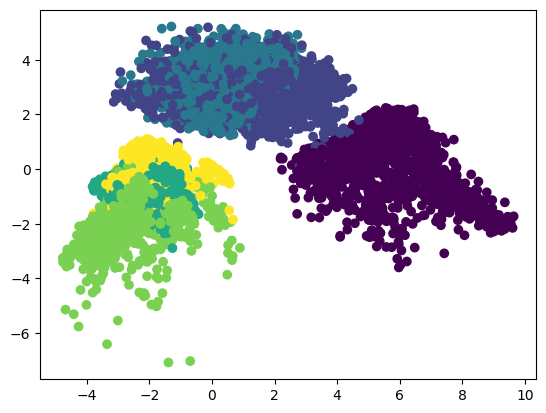

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x=x1, y=x2, c=ys)

In [24]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
clf.fit(X_train_ae, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_ae)

# Calculate the accuracy of the classifier
accuracy = clf.score(X_test_ae, y_test)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [65]:
%history

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)

print(f'Accuracy: {accuracy:.2f}')
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')